In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
df = pd.read_excel("Online Retail.xlsx")

# Drop rows with missing values (important for clustering)
df = df.dropna()

# Optional: Convert InvoiceDate to datetime if you want to use it later
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Feature Engineering: Total cost
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

# Group by CustomerID for customer-level clustering
X = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',            # Number of purchases
    'Quantity': 'sum',                 # Total items bought
    'TotalCost': 'sum',                # Total money spent
}).reset_index()

# Rename for clarity
X.columns = ['CustomerID', 'NumPurchases', 'TotalQuantity', 'TotalSpend']

# Drop non-numeric columns like 'CustomerID' (it will not help in clustering)
X_features = X.drop('CustomerID', axis=1)

# Ensure only numeric columns are included
X_numeric = X_features.select_dtypes(include=['float64', 'int64'])

# Now apply StandardScaler to numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')  # 'auto' to handle initialization
X['Cluster'] = kmeans.fit_predict(X_scaled)

# View clustered customers
print(X.head())


   CustomerID  NumPurchases  TotalQuantity  TotalSpend  Cluster
0     12346.0             2              0        0.00        0
1     12347.0             7           2458     4310.00        0
2     12348.0             4           2341     1797.24        0
3     12349.0             1            631     1757.55        0
4     12350.0             1            197      334.40        0


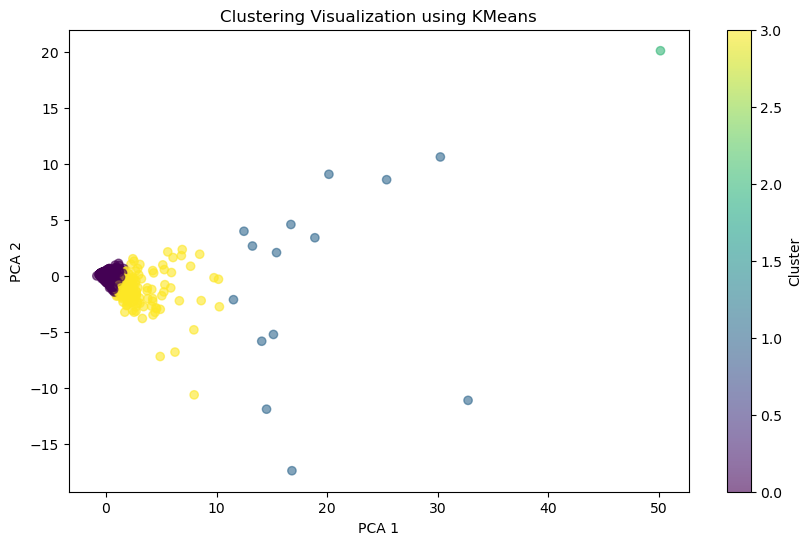

In [36]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['Cluster'], cmap='viridis', label='Clustered Data', alpha=0.6)
plt.title('Clustering Visualization using KMeans')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()
